# 시계열 분석
## #01.작업준비


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sb
import sys

In [5]:
df = pd.read_excel("https://data.hossam.kr/E06/kings.xlsx")
df

,age
0,60
1,43
2,67
3,50
4,56
5,42
6,50
7,65
8,68
9,43


In [6]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. ACF,PACF

정상 시계열 데이터의 경우, ACF는 상대적으로 빠르게 0에 접근한다.

비정상 시계열 데이터의 경우, ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.

|구분|$AR(p)$ 모델 적합|$MA(q)$ 모델 적합|
|--|--|--|
|ACF plot|천천히 감소|첫 값으로부터 q개 뒤에 끊긴다.|
|PACF plot|첫 값으로부터 p개 뒤에 끊긴다.|천천히 감소

### ACF Plot


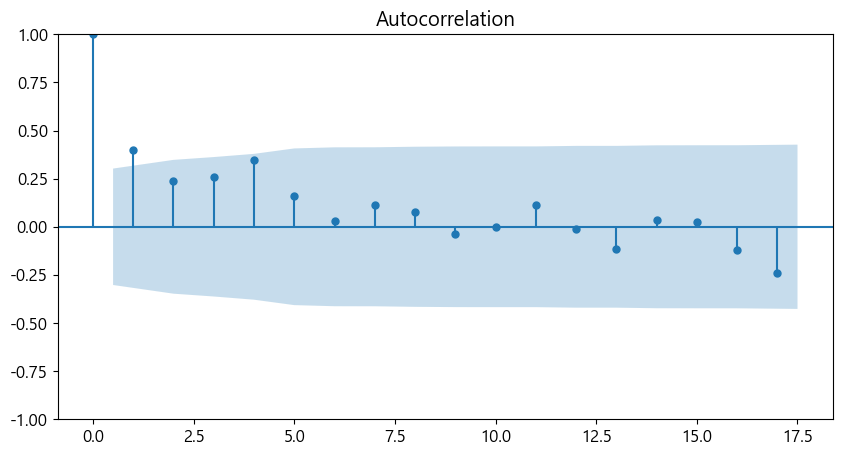

In [7]:
plot_acf(df)
plt.show()
plt.close()

### PACF Plot 




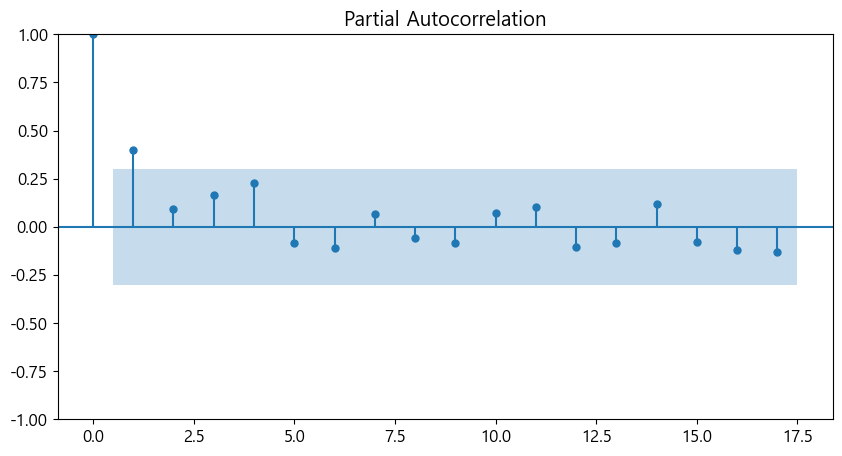

In [11]:
plot_pacf(df)
plt.show()
plt.close()

#### 결과판정

|구분|ACF Plot|PACF plot|
|--|--|--|
|감소|상대적으로급격|상대적으로 완만|
|파란 박스 진입지점|p=1|q=1|

이 결과를 고려하여 완만함을 보이는 PACF 플롯을 채택
MA(1)모델로 결정

### 원본 데이터에 대한 ADF 테스트
ACF, PACF Plot으로 적용할 모델을 결정한다면 차분을 몇 번 수행하는 것이 좋을지 결정해야 한다.

|모델|	의미|
|--|--|
|$AR(n)$| $ARIMA(p,d,q) 중에서 p=n,q=0$ 이라는 의미 |
|$MA(n)$| $ARIMA(p,d,q) 중에서 p=0,q=n$ 이라는 의미 |


ADF 테스트의 결과로 차분의 횟수가 결정되면 이 값이 
를 의미함.

#### ADF 테스트의 가설
|가설|	내용|
|--|--|
|귀무가설|	데이터가 정상성과 다르다 (=비정상성임을 의미)|
|대립가설|	데이터가 정상성이다.|



In [15]:
ar = adfuller(df)
print('ADF Statistic: %f' % ar[0])
print('p-value: %f' % ar[1])
print('num of lags: %f' % ar[2])
print('num of observations: %f' % ar[3])
print('Critical Values:')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.090230
p-value: 0.001005
num of lags: 0.000000
num of observations: 41.000000
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


p-value가 0.05보다 작으므로 귀무가설을 기각하도 대립가설 채택. 즉 예제 데이터는 정상성 데이터

만약 귀무가설이 채택되어 정상성이 아니라고 판단될 경우 차분을 1회 수행하고 다시 ADF 검정을 수행

대립가설이 채택될 때 까지 이 과정을 반복함

반복횟수가 
 $d$값이 됨

이 예제에서는 1번의 차분은 수행해야 한다고 가정함

## #03. 차분 수행

In [17]:
diff1 = df.diff().dropna()
diff1.head()

,age
1,-17.0
2,24.0
3,-17.0
4,6.0
5,-14.0


### 차분 결과로 ADF 테스트 다시 수행


In [18]:
ar = adfuller(diff1)

print('ADF Statistic: %f' % ar[0])
print('p-value: %f' % ar[1])
print('num of lags: %f' % ar[2])
print('num of observations: %f' % ar[3])
print('Critical Values:')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.300508
p-value: 0.000000
num of lags: 2.000000
num of observations: 38.000000
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
